# 문자열 처리

- 파이썬의 기본 문자열 메소드
- 정규표현식 문자열 처리
- <font color='red'> pandas의 문자열 메소드 : str </font>
    
    
(1) 파이썬 기본 문자 관련 메소드

    + str : 
    + upper / lower	:대문자로 변경 / 소문자로 변경
    + count	: 문자열 출현 횟수 반환
    + find	: 찾고자 하는 단어의 첫글자 위치를 반환 ( 없으면 -1 반환)
    + replace	: 문자열을 다른 문자열로 치환
    + strip / rstrip / lstrip	: 문자열 좌우 공백 제거
    + split	: 구분자 기준으로 단어 분리
    + ljust / rjust	: 문자열 왼쪽(오른쪽)정렬하고 남은 길이만큼 공백처리하여 반환

    
    
(2) 정규표현식 문자열 처리 – re 모듈

    ^	문자열 시작	
    [ ]	문자집합이나 범위
    $	문자열 종료	
    { }	횟수 또는 범위
    *	0개 이상	
    ( )	소괄호 안의 문자를 하나의 문자로 인식
    +	1개 이상	
    |	or 연산자 역할
    ?	0개 이거나 1개	
    .	아무 문자

    \s	공백문자	
    \d	숫자[0-9]와 동일
    \S	공백문자가 아닌 나머지 문자	
    \D	숫자를 제외한 모든 문자
    \w	알파벳이나 숫자	
    \특수문자	해당 특수문자
    \W	알파벳이나 숫자를 제외한 문자	
    (?!)	대소문자 구분하지 않음


(3) pandas에서 text 분석을 위한 Series의 문자열 함수
	- 데이터 분석을 위해 문자열 정제작업을 간결하게 처리하는 메소드 제공
    
    cat	: 선택적인 구분자와 함계 요소별 문자열 이어붙임
    contains	: 문자열이 패턴이나 정규표현식을 포함하는지 True/False 배열을 반환
    count	: 일치하는 패턴의 개수를 반환
    findall	: 각 문자열에 대해 일치하는 정규표현식의 전체 목록을 구함
    join	: Series외 각 요소를 주어진 구분자로 연결
    match	: 주어진 정규표현식으로 각 요소에 대한 re.match를 수행하여 일치하는 그룹의 리스트를 반환
    get	: i번째 요소를 반황



### 음원차트 데이타셋

(1) 곡명(name)에서 10글자만 추출

(2) 곡명을 단어들 중 첫 번째 단어만 추출

(3) W로 시작하는 artist_name 추출

(4) album_name에 'LOVE'이라는 단어가 들어있는 데이타 추출

(5) album_name을 5글자로 줄이고 그 뒤는 ... 표시하여 album_name_ax 컬럼을 추가

(6) artist_name에서 ( 또는 - 앞의 단어까지만 추출

In [3]:
import pandas as pd
df = pd.read_excel('data/top100.xlsx', index_col='id')
df

,album_name,artist_name,name,좋아요
id,,,,
31093710,Red Diary Page.2,볼빨간사춘기,여행,124968
31085237,LOVE YOURSELF 轉 `Tear`,방탄소년단,FAKE LOVE,200654
31113240,1÷χ=1 (UNDIVIDED),Wanna One (워너원),켜줘 (Light),93035
31113241,1÷χ=1 (UNDIVIDED),Wanna One (워너원) - 트리플포지션,캥거루 (Kangaroo) (Prod. ZICO),79320
31113243,1÷χ=1 (UNDIVIDED),Wanna One (워너원) - 더힐,모래시계 (Prod. 헤이즈),67872
...,...,...,...,...
31123659,`The Story of Light` EP.2 - The 6th Album,SHINee (샤이니),독감 (Who Waits For Love),12730
30086173,LIFE IS BEAUTY FULL,문문 (MoonMoon),비행운,202347
30383758,종현 소품집 `이야기 Op.2`,종현 (JONGHYUN),Lonely (Feat. 태연),180606


In [4]:
# (1) 곡명(name)에서 10글자만 추출

print(df['name'].str[:10])
print('-'*50)
print(df['name'][:10])


id
31093710            여행
31085237     FAKE LOVE
31113240    켜줘 (Light)
31113241    캥거루 (Kanga
31113243    모래시계 (Prod
               ...    
31123659    독감 (Who Wa
30086173           비행운
30383758    Lonely (Fe
30481578         마지막처럼
30380953    There`s No
Name: name, Length: 100, dtype: object
--------------------------------------------------
id
31093710                              여행
31085237                       FAKE LOVE
31113240                      켜줘 (Light)
31113241     캥거루 (Kangaroo) (Prod. ZICO)
31113243                모래시계 (Prod. 헤이즈)
30699142                            지나오다
30960341                 BOOMERANG (부메랑)
31113242               영원+1 (Prod. NELL)
31052421     밤 (Time for the moon night)
31085238    전하지 못한 진심 (Feat. Steve Aoki)
Name: name, dtype: object


In [5]:
# (2) 곡명을 단어로 나눠서 첫 번째 단어만 추출

# df['name'].str.split().str[0]

df['name'].str.split().str.get(0)

id
31093710         여행
31085237       FAKE
31113240         켜줘
31113241        캥거루
31113243       모래시계
             ...   
31123659         독감
30086173        비행운
30383758     Lonely
30481578      마지막처럼
30380953    There`s
Name: name, Length: 100, dtype: object

In [6]:
# (3) W로 시작하는 artist_name 추출
# df[df['artist_name'].str.startswith('W')]
# condi = df['artist_name'].str.startswith('W')]

df[df['artist_name'].str.find('W')>=0]

,album_name,artist_name,name,좋아요
id,,,,
31113240,1÷χ=1 (UNDIVIDED),Wanna One (워너원),켜줘 (Light),93035
31113241,1÷χ=1 (UNDIVIDED),Wanna One (워너원) - 트리플포지션,캥거루 (Kangaroo) (Prod. ZICO),79320
31113243,1÷χ=1 (UNDIVIDED),Wanna One (워너원) - 더힐,모래시계 (Prod. 헤이즈),67872
30960341,0+1=1 (I PROMISE YOU),Wanna One (워너원),BOOMERANG (부메랑),116807
31113242,1÷χ=1 (UNDIVIDED),Wanna One (워너원) - 린온미,영원+1 (Prod. NELL),65062
31113244,1÷χ=1 (UNDIVIDED),Wanna One (워너원) - 남바완,11 (Prod. 다이나믹듀오),59050
30568338,1X1=1(TO BE ONE),Wanna One (워너원),에너제틱 (Energetic),260417
30725482,1-1=0 (NOTHING WITHOUT YOU),Wanna One (워너원),Beautiful,211145
30930312,0+1=1 (I PROMISE YOU),Wanna One (워너원),약속해요 (I.P.U.),131864


In [7]:
# (4) album_name에 'LOVE'이라는 단어가 들어있는 데이타 추출
# df[df['album_name'].str.contains('LOVE')]

df[df['album_name'].str.find('LOVE')>=0]


,album_name,artist_name,name,좋아요
id,,,,
31085237,LOVE YOURSELF 轉 `Tear`,방탄소년단,FAKE LOVE,200654
31085238,LOVE YOURSELF 轉 `Tear`,방탄소년단,전하지 못한 진심 (Feat. Steve Aoki),129126
30637982,LOVE YOURSELF 承 `Her`,방탄소년단,DNA,301340
31085244,LOVE YOURSELF 轉 `Tear`,방탄소년단,Anpanman,107561
31085243,LOVE YOURSELF 轉 `Tear`,방탄소년단,Airplane pt.2,102741
31085240,LOVE YOURSELF 轉 `Tear`,방탄소년단,낙원,102395
31085242,LOVE YOURSELF 轉 `Tear`,방탄소년단,Magic Shop,106310
31085241,LOVE YOURSELF 轉 `Tear`,방탄소년단,Love Maze,101755
31085239,LOVE YOURSELF 轉 `Tear`,방탄소년단,134340,102354


In [8]:
# 기타
df['album_name'].str.strip() # 좌우 공백제거
df['album_name'].str.lstrip() # 좌 공백제거
df['album_name'].str.rstrip() # 우 공백제거
df['album_name'].str.rstrip(')') # 우측의 ) 제거
df['album_name'].str.lower() # 소문자로
df['album_name'].str.upper() # 대문자로

df['album_name'].str.replace('(UNDIVIDED)','테스트')
df['album_name'].str.replace('(UNDIVIDED)','') # 지우고 싶을 때 - ()는 남아있는데???

id
31093710                             Red Diary Page.2
31085237                       LOVE YOURSELF 轉 `Tear`
31113240                                       1÷χ=1 
31113241                                       1÷χ=1 
31113243                                       1÷χ=1 
                              ...                    
31123659    `The Story of Light` EP.2 - The 6th Album
30086173                          LIFE IS BEAUTY FULL
30383758                            종현 소품집 `이야기 Op.2`
30481578                                        마지막처럼
30380953                 Illuminate (New Deluxe Ver.)
Name: album_name, Length: 100, dtype: object

In [34]:
# (5) album_name을 10글자로 줄이고 그 뒤는 ... 표시하여 album_name_ax 컬럼을 추가
# [힌트] 함수 선언하여  apply 함수이용 가능

# 1. 앞의 10글자 + ... (시각용 표시)
df['album_name_trim'] = df['album_name'].apply(
    lambda x: x[:10] + '...' if isinstance(x, str) and len(x) > 10 else x
)

# 2. 나머지 뒤쪽 문자열 (잘린 후속 부분)
df['album_name_ax'] = df['album_name'].apply(
    lambda x: x[10:] if isinstance(x, str) and len(x) > 10 else ''
)


df[['album_name', 'album_name_ax']]


,album_name,album_name_ax
id,,
31093710,Red Diary Page.2,Page.2
31085237,LOVE YOURSELF 轉 `Tear`,ELF 轉 `Tear`
31113240,1÷χ=1 (UNDIVIDED),IVIDED)
31113241,1÷χ=1 (UNDIVIDED),IVIDED)
31113243,1÷χ=1 (UNDIVIDED),IVIDED)
...,...,...
31123659,`The Story of Light` EP.2 - The 6th Album,of Light` EP.2 - The 6th Album
30086173,LIFE IS BEAUTY FULL,AUTY FULL
30383758,종현 소품집 `이야기 Op.2`,기 Op.2`


### [추가]  톱 100 안에 가수별 곡명 수

In [11]:
df.groupby('artist_name').count()


,album_name,name,좋아요,album_name_trim,album_name_ax
artist_name,,,,,
(여자)아이들,1,1,1,1,1
AOA,1,1,1,1,1
BIGBANG,1,1,1,1,1
BLACKPINK,1,1,1,1,1
Camila Cabello,1,1,1,1,1
...,...,...,...,...,...
펜타곤,1,1,1,1,1
포맨,1,1,1,1,1
폴킴,1,1,1,1,1


In [12]:
result = df['artist_name'].value_counts()


In [13]:
type(result)

pandas.core.series.Series

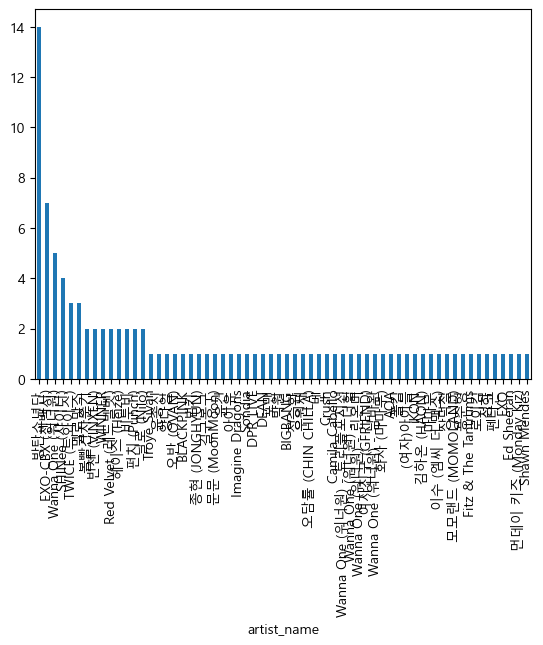

In [14]:
# 한글처리
from matplotlib import rc
rc('font', family='Malgun Gothic')

result.plot(kind='bar');